In [745]:
# Import the required libraries
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import json
import skimage as ski
from skimage import transform

In [746]:
#Your code here
path = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A2B2_T1wT2w/'

v1_info = nib.load(path + '3D_T2w_20240920074836_A2B2.nii.gz').header
v1 = nib.load(path + '3D_T2w_20240920074836_A2B2.nii.gz').get_fdata()  # Extract actual data

print(v1_info)
print(v1_info['pixdim'])


titel_size = 18
label_size = 16


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 54
dim             : [  3 256 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.     0.6    0.3125 0.3125 4.303  0.     0.     0.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'TE=1.2e+02;Time=84917.000')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_

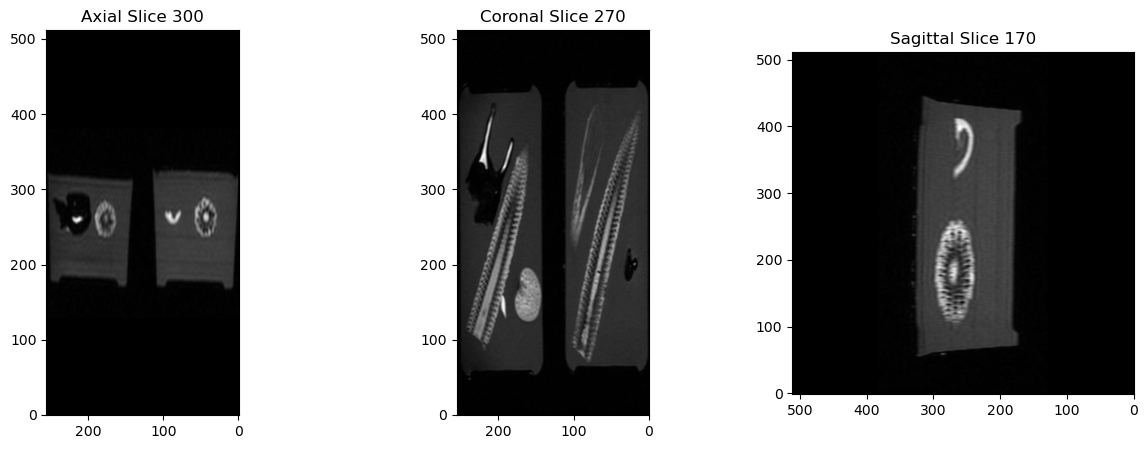

In [747]:
import matplotlib.pyplot as plt
from skimage import transform

# Axial slice (along the Z-axis)
axial_slice = v1[:, :, 300]  # slice 300

# Coronal slice (along the Y-axis)
coronal_slice = v1[:, 270, :]  # slice 270

# Sagittal slice (along the X-axis)
sagittal_slice = v1[70,:, :]  # slice 170



# Visualize all three slices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display Axial slice (flip horizontally to correct orientation)
axes[0].imshow(axial_slice.T, cmap='gray', origin='lower')
axes[0].invert_xaxis()  # Flip to move the small tube to the right
axes[0].set_title('Axial Slice 300')

# Display Coronal slice (flip horizontally for radiological convention)
axes[1].imshow(transform.rotate(coronal_slice.T, angle=0), cmap='gray', origin='lower')
axes[1].invert_xaxis()  # Flip for radiological convention
axes[1].set_title('Coronal Slice 270')

# Display Sagittal slice (flip horizontally for radiological convention)
axes[2].imshow(sagittal_slice.T, cmap='gray', origin='lower')
axes[2].invert_xaxis()  # Flip for radiological convention
axes[2].set_title('Sagittal Slice 170')

plt.show()

Voxel size (mm): [0.6    0.3125 0.3125]


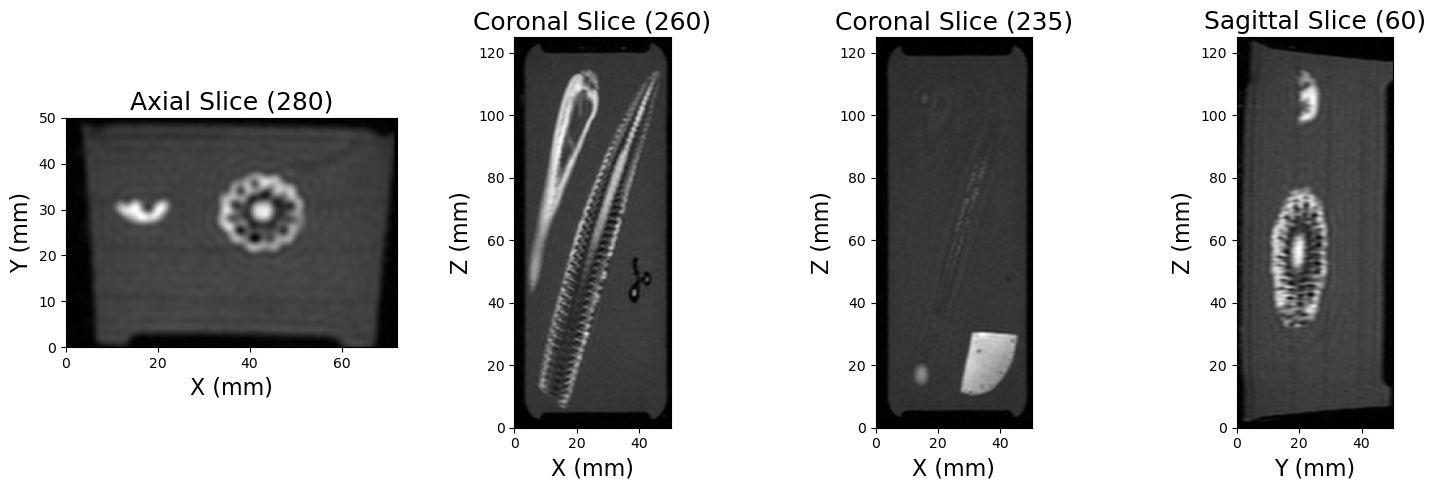

In [748]:
v1_info = nib.load(path + '3D_T1w_20240920074836_A2B2.nii.gz').header
voxel_size = v1_info['pixdim'][1:4]  # Voxel size in mm along each axis (x, y, z)
print(f"Voxel size (mm): {voxel_size}")

# Cropping region (adjust based on your phantom location) Det er her man ændrer på zoom ind og ud
x_range = slice(0, 120)  # Along X-axis (sagittal)
y_range = slice(170, 330)  # Along Y-axis (coronal)
z_range = slice(50, 450)   # Along Z-axis (axial)

# Crop the dataset
cropped_v1 = v1[x_range, y_range, z_range]

# Visualize the cropped dataset slices
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Calculate extent for axis labels (in mm)
extent_axial = [0, cropped_v1.shape[0] * voxel_size[0], 0, cropped_v1.shape[1] * voxel_size[1]]  # for axial view
extent_coronal = [0, cropped_v1.shape[1] * voxel_size[1], 0, cropped_v1.shape[2] * voxel_size[2]]  # for coronal view
extent_sagittal = [0, cropped_v1.shape[1] * voxel_size[1], 0, cropped_v1.shape[2] * voxel_size[2]]  # for sagittal view

# Correct slice indices relative to the cropped data
axial_idx = (280 - z_range.start)  # Adjust index based on z-range cropping
coronal_idx1 = (260 - y_range.start)  # Adjust index based on y-range cropping
coronal_idx2 = (235 - y_range.start)  # Adjust index based on y-range cropping
sagittal_idx = (60 - x_range.start)  # Adjust index based on x-range cropping

# Display Axial slice (mirrored vertically)
axial_slice = cropped_v1[:, :, axial_idx]
axial_slice_mirrored = np.flip(axial_slice, axis=0)  # Mirror the axial slice vertically
axes[0].imshow(axial_slice_mirrored.T, cmap='gray', origin='lower', extent=extent_axial)
axes[0].set_title('Axial Slice (280)', fontsize=titel_size ) # Vertically Mirrored' #(Z-axis)
axes[0].set_xlabel('X (mm)',fontsize=label_size)
axes[0].set_ylabel('Y (mm)',fontsize=label_size)

# Display Coronal slice
# Display Coronal slice (adjusting aspect ratio)
coronal_slice = cropped_v1[:, coronal_idx1, :]
coronal_slice_mirrored = np.flip(coronal_slice, axis=0)  # Mirror the axial slice vertically
axes[1].imshow(coronal_slice_mirrored.T, cmap='gray', origin='lower',extent=extent_coronal)
#axes[1].invert_xaxis()  # Flip x-axis for correct orientation
axes[1].set_title('Coronal Slice (260)', fontsize=titel_size) #(Y-axis)
axes[1].set_xlabel('X (mm)',fontsize=label_size)
axes[1].set_ylabel('Z (mm)',fontsize=label_size)

# Display Coronal slice
# Display Coronal slice (adjusting aspect ratio)
coronal_slice = cropped_v1[:, coronal_idx2, :]
coronal_slice_mirrored = np.flip(coronal_slice, axis=0)  # Mirror the axial slice vertically
axes[2].imshow(coronal_slice_mirrored.T, cmap='gray', origin='lower',extent=extent_coronal)
#axes[2].invert_xaxis()  # Flip x-axis for correct orientation
axes[2].set_title('Coronal Slice (235)', fontsize=titel_size) #(Y-axis)
axes[2].set_xlabel('X (mm)',fontsize=label_size)
axes[2].set_ylabel('Z (mm)',fontsize=label_size)

# Display Sagittal slice
sagittal_slice = cropped_v1[sagittal_idx, :, :]
sagittal_slice_mirrored = np.flip(sagittal_slice, axis=0)  # Mirror the axial slice vertically
axes[3].imshow(sagittal_slice_mirrored.T, cmap='gray', origin='lower',extent=extent_sagittal)
#axes[3].invert_xaxis()
axes[3].set_title('Sagittal Slice (60)', fontsize=titel_size) #(X-axis)
axes[3].set_xlabel('Y (mm)',fontsize=label_size)
axes[3].set_ylabel('Z (mm)',fontsize=label_size)

plt.tight_layout()
plt.show()

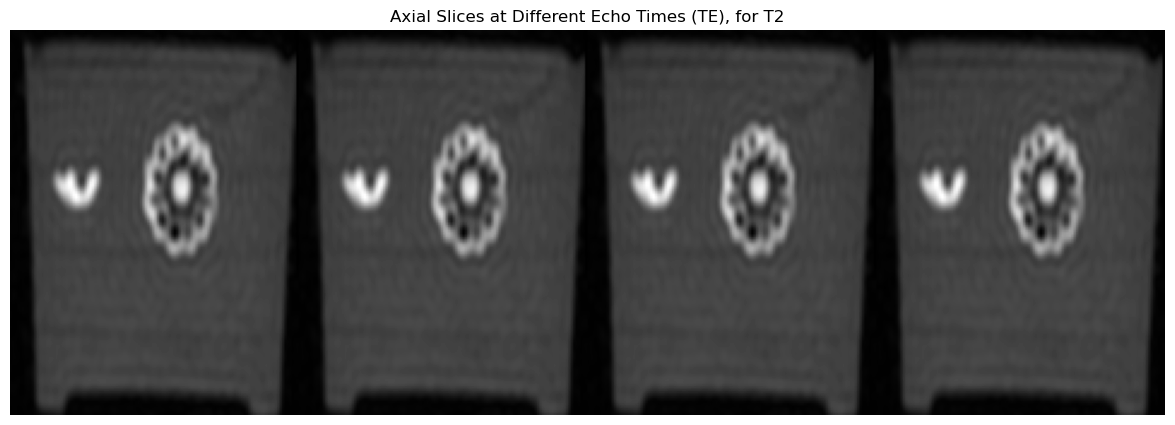

In [749]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Coordinates for the cropped phantom (adjust as per your cropping)
x_start, x_end = 0, 120  # Focus more on the phantom region along X-axis
y_start, y_end = 170, 330  # Focus more on the phantom region along Y-axis
z_slice = 280  # Choose a slice number for axial view


# Load the four NIFTI datasets with different echo times
file1 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A2B2_T1wT2w/3D_T2w_20240920074836_A2B2.nii.gz'
file2 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A2B2_T1wT2w/3D_T2w_20240920074836_A2B2.nii.gz'
file3 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A2B2_T1wT2w/3D_T2w_20240920074836_A2B2.nii.gz'
file4 = '/Users/ceciliajensen/Documents/DTU/Indledende medicinsk billeddannelse/MR_phantom_data/A2B2_T1wT2w/3D_T2w_20240920074836_A2B2.nii.gz'


# Load data and apply cropping to phantom coordinates
v_1 = nib.load(file1).get_fdata()[x_start:x_end, y_start:y_end, :]
v_2 = nib.load(file2).get_fdata()[x_start:x_end, y_start:y_end, :]
v_3 = nib.load(file3).get_fdata()[x_start:x_end, y_start:y_end, :]
v_4 = nib.load(file4).get_fdata()[x_start:x_end, y_start:y_end, :]

# Select the same axial slice from each dataset, rotate 90 degrees counterclockwise, and flip horizontally
i_1 = np.fliplr(np.rot90(v_1[:, :, z_slice]))
i_2 = np.fliplr(np.rot90(v_2[:, :, z_slice]))
i_3 = np.fliplr(np.rot90(v_3[:, :, z_slice]))
i_4 = np.fliplr(np.rot90(v_4[:, :, z_slice]))

# Stack the images horizontally and plot
plt.figure(figsize=(15, 5))
plt.imshow(np.hstack([i_1, i_2, i_3, i_4]), cmap='gray')
plt.title('Axial Slices at Different Echo Times (TE), for T2')
plt.xlabel('TE 4ms | TE 15ms | TE 30ms | TE 50ms')
plt.axis('off')  # Turn off axis for better visualization
plt.show()

##### Majs og chili intensitetsprofil 

Voxel size (mm): [0.6    0.3125 0.3125]


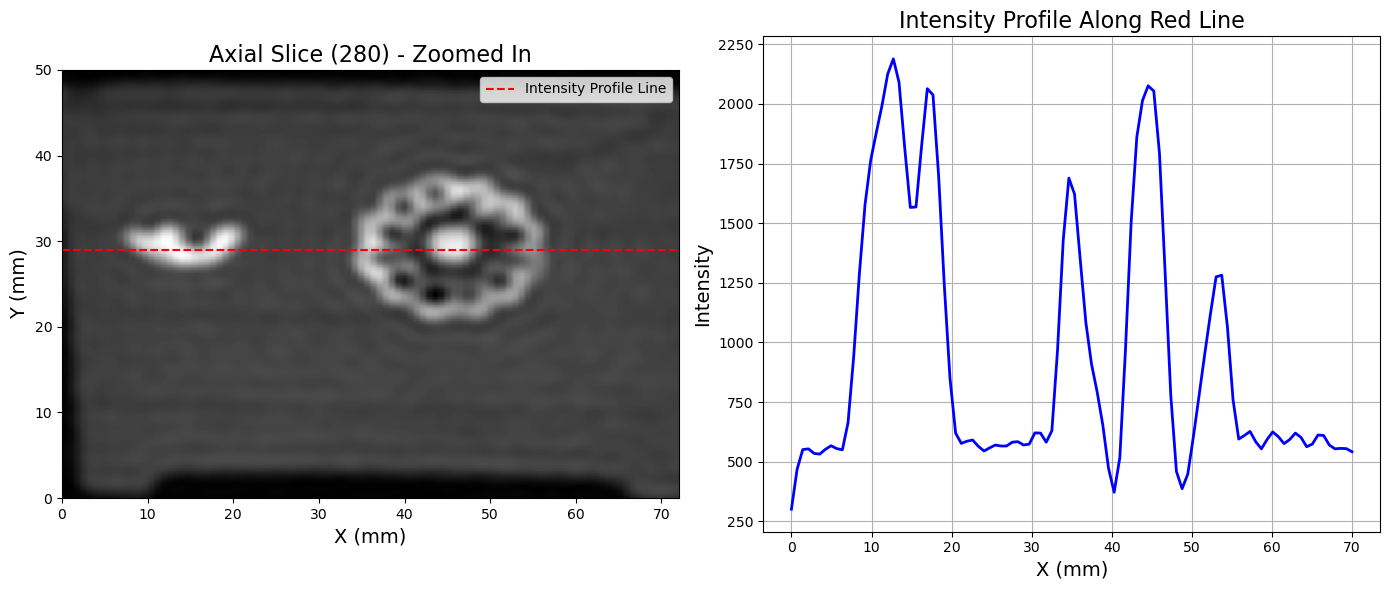

In [765]:
import matplotlib.pyplot as plt
import numpy as np


x_range_tand = slice(0, 120)  # Along X-axis (sagittal)
y_range_tand = slice(170, 330)  # Along Y-axis (coronal)
z_range_tand = slice(50, 450)   # Along Z-axis (axial)

# Crop the dataset
cropped_v1_tand = v1[x_range_tand, y_range_tand, z_range_tand]

# Correct the slice index based on your cropping
axial_idx_tand = (280 - z_range_tand.start)  # Adjust index based on z-range cropping

# Extract the axial slice and mirror it vertically
axial_slice_tand = cropped_v1_tand[:, :, axial_idx_tand]
axial_slice_mirrored_tand = np.flip(axial_slice_tand, axis=0)  # Mirror vertically

# Calculate the extent for axis labels (in mm)
extent_axial = [0, cropped_v1_tand.shape[0] * voxel_size[0], 0, cropped_v1_tand.shape[1] * voxel_size[1]]

# Specify ROI in millimeters
x_start_img, x_end_img =5, 65  # Range for X-axis (sagittal dimension, in mm)
y_start_img, y_end_img = 0, 50  # Range for Y-axis (coronal dimension, in mm)

x_start_mm, x_end_mm = 0, 70  # Range for X-axis (sagittal dimension, in mm)
y_start_mm, y_end_mm = 0, 50  # Range for Y-axis (coronal dimension, in mm)

# Convert millimeter values to pixel indices
x_start = int(x_start_img / voxel_size[0])  # Convert X-axis start in mm to pixels
x_end = int(x_end_img / voxel_size[0])      # Convert X-axis end in mm to pixels
y_start = int(y_start_img / voxel_size[1])  # Convert Y-axis start in mm to pixels
y_end = int(y_end_img / voxel_size[1])      # Convert Y-axis end in mm to pixels

# Extract the zoomed-in region
zoomed_axial_slice_tand = axial_slice_mirrored_tand[x_start:x_end, y_start:y_end]

line_position = 29  # Adjust as needed

# Extract the intensity values along the red line (y = line_position in pixels)
line_pixel_index = int(line_position / voxel_size[1])  # Convert line position in mm to pixel index
intensity_profile = zoomed_axial_slice_tand[:, line_pixel_index]  # Extract intensities along the line

# Calculate the corresponding X-axis range in mm
x_profile_range_mm = np.linspace(x_start_mm, x_end_mm, intensity_profile.shape[0])

# Create a subplot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns
v1_info = nib.load(path + '3D_T1w_20240920074836_A2B2.nii.gz').header
voxel_size = v1_info['pixdim'][1:4]  # Voxel size in mm along each axis (x, y, z)
print(f"Voxel size (mm): {voxel_size}")

axs[0].imshow(zoomed_axial_slice_tand.T, cmap='gray', origin='lower', extent=extent_axial)
axs[0].axhline(y=line_position, color='red', linestyle='--', label='Intensity Profile Line')
axs[0].set_title('Axial Slice (280) - Zoomed In', fontsize=16)
axs[0].set_xlabel('X (mm)', fontsize=14)
axs[0].set_ylabel('Y (mm)', fontsize=14)
axs[0].legend()

# Plot the intensity profile
axs[1].plot(x_profile_range_mm, intensity_profile, color='blue', linewidth=2)
axs[1].set_title('Intensity Profile Along Red Line', fontsize=16)
axs[1].set_xlabel('X (mm)', fontsize=14)
axs[1].set_ylabel('Intensity', fontsize=14)
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


##### Tand intensitetsprofil 

Voxel size (mm): [0.6    0.3125 0.3125]


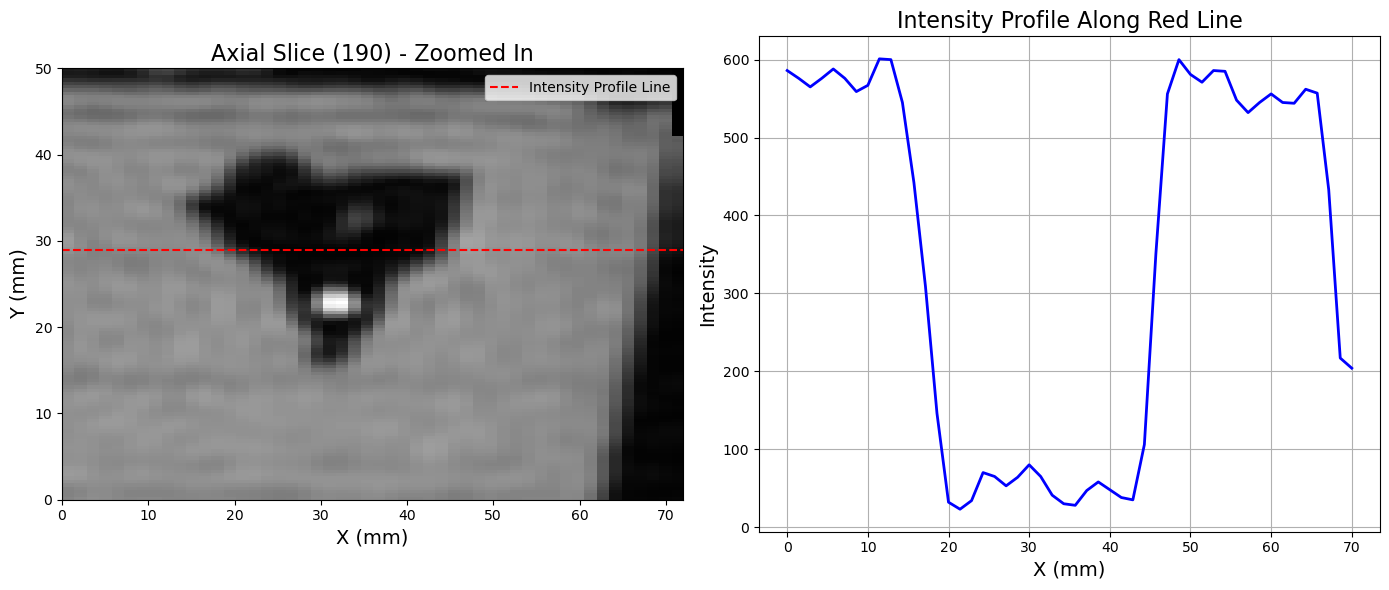

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x_range_tand = slice(0, 120)  # Along X-axis (sagittal)
y_range_tand = slice(170, 330)  # Along Y-axis (coronal)
z_range_tand = slice(50, 450)   # Along Z-axis (axial)

# Crop the dataset
cropped_v1_tand = v1[x_range_tand, y_range_tand, z_range_tand]

# Correct the slice index based on your cropping
axial_idx_tand = (190 - z_range_tand.start)  # Adjust index based on z-range cropping

# Extract the axial slice and mirror it vertically
axial_slice_tand = cropped_v1_tand[:, :, axial_idx_tand]
axial_slice_mirrored_tand = np.flip(axial_slice_tand, axis=0)  # Mirror vertically

# Calculate the extent for axis labels (in mm)
extent_axial = [0, cropped_v1_tand.shape[0] * voxel_size[0], 0, cropped_v1_tand.shape[1] * voxel_size[1]]

# Specify ROI in millimeters
x_start_img, x_end_img = 42, 90  # Range for X-axis (sagittal dimension, in mm)
y_start_img, y_end_img = 10, 200  # Range for Y-axis (coronal dimension, in mm)

x_start_mm, x_end_mm = 0, 70  # Range for X-axis (sagittal dimension, in mm)
y_start_mm, y_end_mm = 0, 50  # Range for Y-axis (coronal dimension, in mm)

# Convert millimeter values to pixel indices
x_start = int(x_start_img / voxel_size[0])  # Convert X-axis start in mm to pixels
x_end = int(x_end_img / voxel_size[0])      # Convert X-axis end in mm to pixels
y_start = int(y_start_img / voxel_size[1])  # Convert Y-axis start in mm to pixels
y_end = int(y_end_img / voxel_size[1])      # Convert Y-axis end in mm to pixels

# Extract the zoomed-in region
zoomed_axial_slice_tand = axial_slice_mirrored_tand[x_start:x_end, y_start:y_end]

line_position = 29  # Adjust as needed

# Extract the intensity values along the red line (y = line_position in pixels)
line_pixel_index = int(line_position / voxel_size[1])  # Convert line position in mm to pixel index
intensity_profile = zoomed_axial_slice_tand[:, line_pixel_index]  # Extract intensities along the line

# Calculate the corresponding X-axis range in mm
x_profile_range_mm = np.linspace(x_start_mm, x_end_mm, intensity_profile.shape[0])

# Create a subplot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns
v1_info = nib.load(path + '3D_T1w_20240920074836_A2B2.nii.gz').header
voxel_size = v1_info['pixdim'][1:4]  # Voxel size in mm along each axis (x, y, z)
print(f"Voxel size (mm): {voxel_size}")

axs[0].imshow(zoomed_axial_slice_tand.T, cmap='gray', origin='lower', extent=extent_axial)
axs[0].axhline(y=line_position, color='red', linestyle='--', label='Intensity Profile Line')
axs[0].set_title('Axial Slice (190) - Zoomed In', fontsize=16)
axs[0].set_xlabel('X (mm)', fontsize=14)
axs[0].set_ylabel('Y (mm)', fontsize=14)
axs[0].legend()

# Plot the intensity profile
axs[1].plot(x_profile_range_mm, intensity_profile, color='blue', linewidth=2)
axs[1].set_title('Intensity Profile Along Red Line', fontsize=16)
axs[1].set_xlabel('X (mm)', fontsize=14)
axs[1].set_ylabel('Intensity', fontsize=14)
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


##### Agurk intensitetsprofil 

Voxel size (mm): [0.6    0.3125 0.3125]


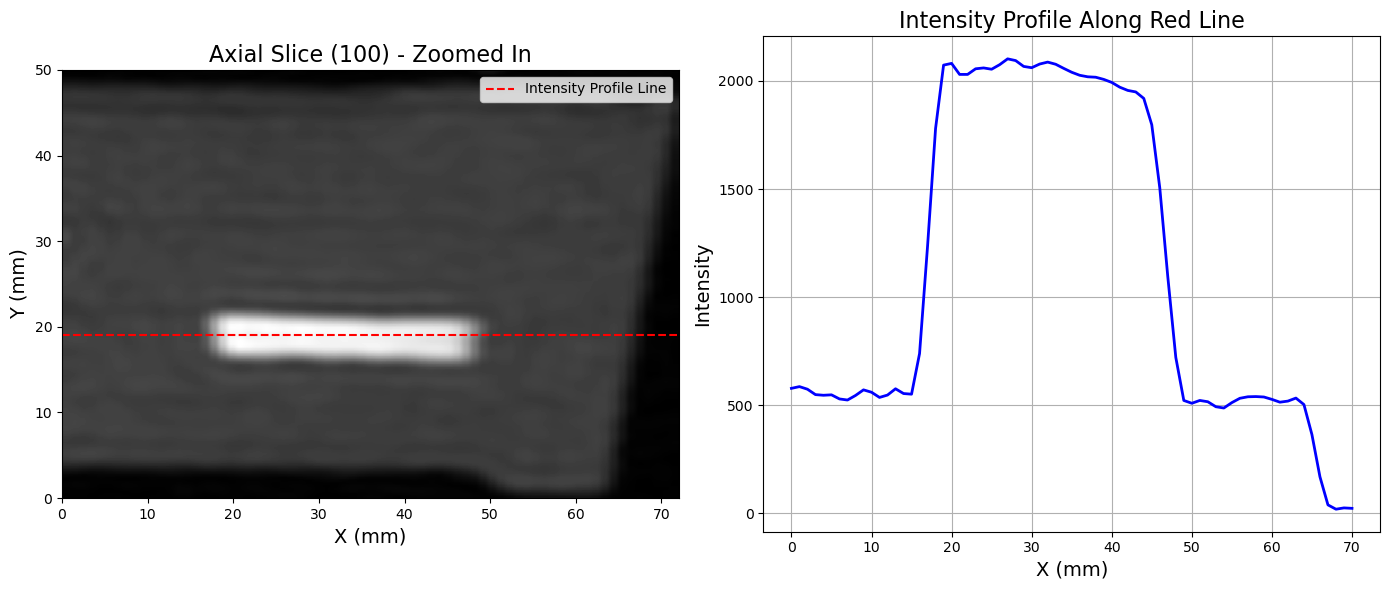

In [767]:
import matplotlib.pyplot as plt
import numpy as np

# Load voxel size information
v1_info = nib.load(path + '3D_T1w_20240920074836_A2B2.nii.gz').header
voxel_size = v1_info['pixdim'][1:4]  # Voxel size in mm along each axis (x, y, z)
print(f"Voxel size (mm): {voxel_size}")

# Define cropping ranges
x_range_agurk = slice(0, 120)  # Along X-axis (sagittal)
y_range_agurk = slice(170, 330)  # Along Y-axis (coronal)
z_range_agurk = slice(50, 450)   # Along Z-axis (axial)

# Crop the dataset
cropped_v1_agurk = v1[x_range_agurk, y_range_agurk, z_range_agurk]

# Correct the slice index based on your cropping
axial_idx_agurk = (100 - z_range_agurk.start)  # Adjust index based on z-range cropping

# Extract the axial slice and mirror it vertically
axial_slice_agurk = cropped_v1_agurk[:, :, axial_idx_agurk]
axial_slice_mirrored_agurk = np.flip(axial_slice_agurk, axis=0)  # Mirror vertically

# Calculate the extent for axis labels (in mm)
extent_axial = [0, cropped_v1_agurk.shape[0] * voxel_size[0], 0, cropped_v1_agurk.shape[1] * voxel_size[1]]

# Specify ROI in millimeters
x_start_img, x_end_img = 30, 80  # Range for X-axis (sagittal dimension, in mm)
y_start_img, y_end_img = 0, 60  # Range for Y-axis (coronal dimension, in mm)

x_start_mm, x_end_mm = 0, 70  # Range for X-axis (sagittal dimension, in mm)
y_start_mm, y_end_mm = 0, 50  # Range for Y-axis (coronal dimension, in mm)

# Convert millimeter values to pixel indices
x_start = int(x_start_img / voxel_size[0])  # Convert X-axis start in mm to pixels
x_end = int(x_end_img / voxel_size[0])      # Convert X-axis end in mm to pixels
y_start = int(y_start_img / voxel_size[1])  # Convert Y-axis start in mm to pixels
y_end = int(y_end_img / voxel_size[1])      # Convert Y-axis end in mm to pixels

# Extract the zoomed-in region
zoomed_axial_slice_agurk = axial_slice_mirrored_agurk[x_start:x_end, y_start:y_end]

line_position = 19  # Position of the red line in mm

# Extract the intensity values along the red line
line_pixel_index = int(line_position / voxel_size[1])  # Convert line position in mm to pixel index
intensity_profile = zoomed_axial_slice_agurk[:, line_pixel_index]  # Extract intensities along the line

# Calculate the corresponding X-axis range in mm
x_profile_range_mm = np.linspace(x_start_mm, x_end_mm, intensity_profile.shape[0])

# Create a subplot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the zoomed-in region with the red line
axs[0].imshow(zoomed_axial_slice_agurk.T, cmap='gray', origin='lower', extent=extent_axial)
axs[0].axhline(y=line_position, color='red', linestyle='--', label='Intensity Profile Line')
axs[0].set_title('Axial Slice (100) - Zoomed In', fontsize=16)
axs[0].set_xlabel('X (mm)', fontsize=14)
axs[0].set_ylabel('Y (mm)', fontsize=14)
axs[0].legend()

# Plot the intensity profile
axs[1].plot(x_profile_range_mm, intensity_profile, color='blue', linewidth=2)
axs[1].set_title('Intensity Profile Along Red Line', fontsize=16)
axs[1].set_xlabel('X (mm)', fontsize=14)
axs[1].set_ylabel('Intensity', fontsize=14)
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
